# 机器学习实验三：参数估计 & 非参数估计
- **姓名：刘伟**
- **学号：2013029**
- **专业：物联网工程**

## 基本要求：
   生成两个各包含 N=1200 个二维随机向量的数据集合**X1**和**X2**，数据集合中随机向量来自于三个分布模型，分别满足均值向量 μ1=[1,4],μ2=[4,1],μ3=[8,4] 和协方差矩阵 D1=D2=D3=2*I* ，其中 *I* 是  2∗2 的单位矩阵。在生成数据集合 **X1** 时，假设来自三个分布模型的先验概率相同；而在生成数据集合 **X2** 时，先验概率如下：p(w1)=0.6, p(w2)=0.1, p(w3)=0.3 
   
    1. 在两个数据集合上分别应用“似然率测试规则”、“最大后验概率规则”进行分类实验，计算分类错误率，分析实验结果。
    
    2. 在两个数据集合上分别应用 h=1 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。

### 生成数据集

In [1]:
# 导入实验所需相关库
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

In [3]:
def Generate_DataSet_plot(mean, cov, P):
    # 画出不同先验对应的散点图
    xx = []
    label = 1
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    # 画图
    plt.figure()
    for i in range(3):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

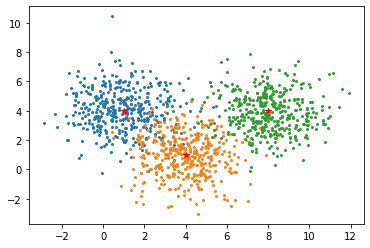

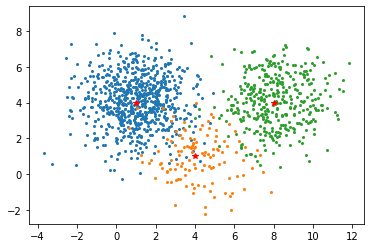

In [4]:
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]  # 协方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率

# 生成 X1 和 X2 俩种数据
X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)

# 将俩种数据里面的 三类数据单独划分出来，以备后续使用
X1_1 = X1[0]
X1_2 = X1[1]
X1_3 = X1[2]
X2_1 = X2[0]
X2_2 = X2[1]
X2_3 = X2[2]
X1 = np.vstack(X1)
X2 = np.vstack(X2)

#### 一、在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。

#### 先求出三种高斯分布对应数据的均值与协方差
#### 生成参数  mean 和 cov 数据

In [5]:
Mean1 = []
Mean1.append(np.mean(X1_1[:,0:2],axis=0))
Mean1.append(np.mean(X1_2[:,0:2],axis=0))
Mean1.append(np.mean(X1_3[:,0:2],axis=0))

Mean2 = []
Mean2.append(np.mean(X2_1[:,0:2],axis=0))
Mean2.append(np.mean(X2_2[:,0:2],axis=0))
Mean2.append(np.mean(X2_3[:,0:2],axis=0))

Mean1 = np.array(Mean1)
Mean2 = np.array(Mean2)

print(Mean1)
print(Mean2)

[[0.9361573990414618 4.051044983248851]
 [3.9527801066482144 0.9560948703292734]
 [7.978467064190447 3.8993094807425814]]
[[1.05567291 4.07458713]
 [4.15185302 0.96350749]
 [8.06301724 4.07719829]]


In [6]:
Cov1 = []
Cov1.append(np.cov((np.array(X1_1[:,0:2])).astype(float),rowvar=False))
Cov1.append(np.cov((np.array(X1_2[:,0:2])).astype(float),rowvar=False))
Cov1.append(np.cov((np.array(X1_3[:,0:2])).astype(float),rowvar=False))

Cov2 = []
Cov2.append(np.cov((np.array(X2_1[:,0:2])).astype(float),rowvar=False))
Cov2.append(np.cov((np.array(X2_2[:,0:2])).astype(float),rowvar=False))
Cov2.append(np.cov((np.array(X2_3[:,0:2])).astype(float),rowvar=False))

Cov1 = np.array(Cov1)
Cov2 = np.array(Cov2)

print(Cov1)
print(Cov2)

[[[ 2.01892591 -0.08158589]
  [-0.08158589  2.08379829]]

 [[ 1.77978897 -0.10888323]
  [-0.10888323  2.00124978]]

 [[ 1.94701036 -0.05852   ]
  [-0.05852     1.87102992]]]
[[[ 1.96176692  0.02608278]
  [ 0.02608278  2.01136493]]

 [[ 2.0349171  -0.24369987]
  [-0.24369987  1.73312589]]

 [[ 1.98069132  0.20828631]
  [ 0.20828631  2.0513286 ]]]


##### 似然率测试规则

In [7]:
def Gauss_Probability(x,mean,cov):  # 密度函数 MLE
    sigma = np.linalg.det(cov)
    probability = (1/(2*np.pi*(np.sqrt(sigma))))*np.exp(-((x-mean)@np.linalg.inv(cov)@((x-mean).T))/2)
    return probability

In [8]:
def linear_Test(X,Mean,Cov):  # X是1200个数据  mean中存放了三种高斯分布数据的均值 cov中存放了三种高斯分布数据的协方差矩阵    
    class_num = 3  # 分类种类
    num = X.shape[0] # 样本数量
    error_num = 0 # 记录预测错误量
    Y_p = []  #记录预测的结果

    for i in range(num):
        P_pred = np.zeros(class_num)  # [0. 0. 0.]
        for j in range(class_num):
            P_pred[j] = Gauss_Probability(X[i][0:2],Mean[j],Cov[j])
            # print(P_pred[j])
        P_class = np.argmax(P_pred) + 1
        Y_p.append(P_class)

        # 计算错误数量
        if P_class != X[i][2]:
            error_num += 1
    
    print("分类错误率：",error_num/num)

    return Y_p
        

In [9]:
Y_1 = linear_Test(X1,Mean1,Cov1)
Y_2 = linear_Test(X2,Mean2,Cov2)

分类错误率： 0.06833333333333333
分类错误率： 0.0575


##### 最大后验概率规则

In [10]:
def Max_posterior_probability(X,Mean,Cov,P):  # X是1200个数据  mean中存放了三种高斯分布数据的均值 cov中存放了三种高斯分布数据的协方差矩阵    
    class_num = 3  # 分类种类
    num = X.shape[0] # 样本数量
    error_num = 0 # 记录预测错误量
    Y_p = []  #记录预测的结果

    for i in range(num):
        P_pred = np.zeros(class_num)  # [0. 0. 0.]
        for j in range(class_num):
            P_pred[j] = Gauss_Probability(X[i][0:2],Mean[j],Cov[j])*P[j]  # MLE 乘以 后验 Prior
            # print(P_pred[j])
        P_class = np.argmax(P_pred) + 1
        Y_p.append(P_class)

        # 计算错误数量
        if P_class != X[i][2]:
            error_num += 1
    
    print("分类错误率：",error_num/num)

    return Y_p

In [11]:
Y_1 = Max_posterior_probability(X1,Mean1,Cov1,P1)
Y_2 = Max_posterior_probability(X2,Mean2,Cov2,P2)

分类错误率： 0.06833333333333333
分类错误率： 0.03833333333333333


#### 二、在两个数据集合上分别应用 h=1 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果

#### 一、方窗核函数

In [12]:
def Square_window_Kernel(x_in,X,h):  # x_in测试数据  X 整体数据  h窗口大小
    N = X.shape[0]
    X_n = X - x_in
    X_n = np.sqrt(np.sum((X_n**2),axis=1,dtype=np.float64))/h
    phi = np.zeros(N)
    
    for i,x_i in enumerate(X_n):
        if x_i<=0.5:
            phi[i] = 1

    probability = (np.sum(phi/(h**2)))/N
    return probability

In [13]:
def Kernel_linear_Test_Square_window(X,X_Train,h):  # X是1200个数据  X_Train内包含的是对应的3类数据
    class_num = 3  # 分类种类
    num = X.shape[0] # 样本数量
    error_num = 0 # 记录预测错误量
    Y_p = []  #记录预测的结果

    for i in range(num):
        P_pred = np.zeros(class_num)  # [0. 0. 0.]
        for j in range(class_num):
            # 对于数据属于哪一类的预估
            # X_Train[j]里面存放的便是每一类的数据集
            P_pred[j] = Square_window_Kernel(X[i][0:2],X_Train[j][:,0:2],h)
            # print(j+1,P_pred[j])
        P_class = np.argmax(P_pred) + 1
        Y_p.append(P_class)

        # 计算错误数量
        if P_class != X[i][2]:
            error_num += 1
    
    print("分类错误率：",error_num/num)

    return Y_p
        

##### 利用最开始的X1_1、X2_1之类的数据 生成 X_Train1 和 X_Train2俩种数据

In [14]:
X_Train1 = []
X_Train2 = []
X_Train1.append(X1_1)
X_Train1.append(X1_2)
X_Train1.append(X1_3)
X_Train2.append(X2_1)
X_Train2.append(X2_2)
X_Train2.append(X2_3)

In [15]:
h = 1
# 取 h=1 进行测试
Y_1 = Kernel_linear_Test_Square_window(X1,X_Train1,h)
Y_2 = Kernel_linear_Test_Square_window(X2,X_Train2,h)

分类错误率： 0.059166666666666666
分类错误率： 0.049166666666666664


##### 高斯核函数

In [16]:
def Gaussian_Kernel(x, X, h=2):
    # 计算概率p(x|w)
    p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

In [17]:
def Kernel_linear_Test_Gaussian_Kernel(X,X_Train,h):  # X是1200个数据  
    class_num = 3  # 分类种类
    num = X.shape[0] # 样本数量
    error_num = 0 # 记录预测错误量
    Y_p = []  #记录预测的结果

    for i in range(num):
        P_pred = np.zeros(class_num)  # [0. 0. 0.]
        for j in range(class_num):
            # 对于数据属于哪一类的预估
            # X_Train[j]里面存放的便是每一类的数据集
            P_pred[j] = Gaussian_Kernel(X[i][0:2],X_Train[j][:,0:2],h)
            # print(j+1,P_pred[j])
        P_class = np.argmax(P_pred) + 1
        Y_p.append(P_class)

        # 计算错误数量
        if P_class != X[i][2]:
            error_num += 1
    # print(error_num)
    print("分类错误率：",error_num/num)

    return Y_p

In [18]:
h = 1
# 取 h=1 进行测试
Y_1 = Kernel_linear_Test_Gaussian_Kernel(X1,X_Train1,h)
Y_2 = Kernel_linear_Test_Gaussian_Kernel(X2,X_Train2,h)

分类错误率： 0.06916666666666667
分类错误率： 0.0575


In [19]:
Y_t = Kernel_linear_Test_Gaussian_Kernel(X2,X_Train2,0.1)
Y_t = Kernel_linear_Test_Gaussian_Kernel(X2,X_Train2,0.5)
Y_t = Kernel_linear_Test_Gaussian_Kernel(X2,X_Train2,1)
Y_t = Kernel_linear_Test_Gaussian_Kernel(X2,X_Train2,1.5)
Y_t = Kernel_linear_Test_Gaussian_Kernel(X2,X_Train2,2.0)

分类错误率： 0.0175
分类错误率： 0.055
分类错误率： 0.0575
分类错误率： 0.06
分类错误率： 0.060833333333333336


## 初级要求：实验结果分析

- 首先应用“似然率测试规则”和“最大后验概率规则”进行分类实验
    从分类结果中可以看出俩种测试方法对于X1：三个分布模型来源概率相同的情况下，测量的效果是一样的，因为Prior在这里不起到影响作用。但从俩种规则对于X2的测试情况便可看出，似然概率规则的缺陷，不能够很好的利用到数据来源的信息比重，导致测量的准确率低于最大后验规则
    
- 应用 h=1 的方窗核函数和高斯核函数方法，进行分类实验
   测量结果显示的情况来看，X2的预测准确率要更高于X1。但是核函数的测量需要考虑 窗口大小h的选择。不同的窗口大小会造成不一样的实验结果。

## 中级要求
根据初级要求中使用的一个核函数，在数据集 **X2** 上应用交叉验证法，在 h∈[0.1,0.5,1,1.5,2] 中寻找最优的h值。

In [20]:
# 交叉验证 分成10份，每份各占10%
# 分层划分 每层划分成10份  X2_1  x2_2  X2_3
# 生成随机序列
# X2_1.shape[0] #720
row_indices1 = X2_1.shape[0]
# 10% 的分割线
split_num1 = int(row_indices1*0.1)

# X2_2.shape[0] #120
row_indices2 = X2_2.shape[0]
# 10% 的分割线
split_num2 = int(row_indices2*0.1)

# X2_3.shape[0] #360
row_indices3 = X2_3.shape[0]
# 10% 的分割线
split_num3 = int(row_indices3*0.1)

# 存放三类数据分层10%后的数据集
X1_array = []
X2_array = []
X3_array = []

# 10 份数据
for i in range(10):
    # 取出每一个quality类别下 10% 的训练数据
    x2_1_train = X2_1[i*split_num1:(i+1)*split_num1,:]
    # print(x2_1_train.shape)
    X1_array.append(x2_1_train)

    x2_2_train = X2_2[i*split_num2:(i+1)*split_num2,:]
    # print(x2_2_train.shape)
    X2_array.append(x2_2_train)

    x2_3_train = X2_3[i*split_num3:(i+1)*split_num3,:]
    # print(x2_3_train.shape)
    X3_array.append(x2_3_train)


### 利用高斯核函数进行交叉验证 X2 数据较为合适的 h 窗口大小

In [21]:
def Cross_Kernel_linear_Test_Gaussian_Kernel(X_test,X_train,h):  # X是1200个数据  
    class_num = 3  # 分类种类
    num = X_test.shape[0] # 样本数量
    error_num = 0 # 记录预测错误量
    Y_p = []  #记录预测的结果

    for i in range(num):
        P_pred = np.zeros(class_num)  # [0. 0. 0.]
        for j in range(class_num):
            # print(np.array(X_train[j]).shape)
            P_pred[j] = Gaussian_Kernel(X_test[i][0:2],X_train[j][:,0:2],h)
            # print(P_pred[j])
        P_class = np.argmax(P_pred) + 1
        Y_p.append(P_class)

        # 计算错误数量
        if P_class != X_test[i][2]:
            error_num += 1
    
    # print("分类错误数目：",error_num)

    return error_num

In [22]:
# 不同的 窗口 h 大小选择
H = [0.1,0.5,1.0,1.5,2.0]

# 交叉验证
for h_index in H:
    
    # 总错误量
    all_error_num = 0
    
    for i in range(10):
        # 循环 10 次，每次从三种数据中各选出 10% 作为测试集
        X_test = np.concatenate((X1_array[i],X2_array[i],X3_array[i]),axis=0)
        
        # 训练集 则是 除却测试集以外的三种数据 90% 那一部分
        X_train = []
        X_train_1 = np.empty(shape=(0,3))
        X_train_2 = np.empty(shape=(0,3))
        X_train_3 = np.empty(shape=(0,3))
        for j in range(10):
            if j!=i:
                X_train_1 = np.concatenate((X_train_1,X1_array[j]))
                X_train_2 = np.concatenate((X_train_2,X2_array[j]))
                X_train_3 = np.concatenate((X_train_3,X3_array[j]))
        X_train.append(X_train_1)
        X_train.append(X_train_2)
        X_train.append(X_train_3)
        
        # 记录每一批测试集的 预测错误样本数
        error_num = Cross_Kernel_linear_Test_Gaussian_Kernel(X_test,X_train,h_index)
        all_error_num = all_error_num + error_num
    
    print("窗口大小h：", h_index)
    print("分类错误率：", all_error_num/1200)
    print("===============================")


窗口大小h： 0.1
分类错误率： 0.06583333333333333
窗口大小h： 0.5
分类错误率： 0.0625
窗口大小h： 1.0
分类错误率： 0.058333333333333334
窗口大小h： 1.5
分类错误率： 0.06
窗口大小h： 2.0
分类错误率： 0.06


In [23]:
# 不同的 窗口 h 大小选择
H = [0.1,0.5,1.0,1.5,2.0]

# 交叉验证
for h_index in H:
    
    # 总错误量
    all_error_num = 0
    
    for i in range(10):
        # 循环 10 次，每次从三种数据中各选出 10% 作为测试集
        X_test = np.concatenate((X1_array[i],X2_array[i],X3_array[i]),axis=0)
        
        # 训练集 则是 除却测试集以外的三种数据 90% 那一部分
        X_train = []
        X_train_1 = np.empty(shape=(0,3))
        X_train_2 = np.empty(shape=(0,3))
        X_train_3 = np.empty(shape=(0,3))
        for j in range(10):
                X_train_1 = np.concatenate((X_train_1,X1_array[j]))
                X_train_2 = np.concatenate((X_train_2,X2_array[j]))
                X_train_3 = np.concatenate((X_train_3,X3_array[j]))
        X_train.append(X_train_1)
        X_train.append(X_train_2)
        X_train.append(X_train_3)
        
        # 记录每一批测试集的 预测错误样本数
        error_num = Cross_Kernel_linear_Test_Gaussian_Kernel(X_test,X_train,h_index)
        all_error_num = all_error_num + error_num
    
    print("窗口大小h：", h_index)
    print("分类错误率：", all_error_num/1200)
    print("===============================")

窗口大小h： 0.1
分类错误率： 0.0175
窗口大小h： 0.5
分类错误率： 0.055
窗口大小h： 1.0
分类错误率： 0.0575
窗口大小h： 1.5
分类错误率： 0.06
窗口大小h： 2.0
分类错误率： 0.060833333333333336


## 中级要求：结构分析

- 在实验过程中，交叉验证采取的是10折的方法。从多次测量结果显示来看（**ipynb中显示的只是其中的一次结果**）：h = 0.1、0.5、1.0的测量准确率都较为优异，h = 1.5、2.0则不如前三者。

- 实验遇到的疑惑：在初级要求的最后，作者曾尝试过对于 h取不同值，对X2数据进行高斯核函数预测，结果看出 h = 0.1是最为优异的，但是交叉验证并没有得到类似的结果。**作者一开始怀疑可能是交叉验证的代码出现了问题，但是在后续中级要求最后一部分，作者将交叉验证部分的训练集改成了全数据集，也就是不再有90%的数据集做训练集。得到的实验结果与基本要求一致，证明交叉验证的代码是没有问题的。作者最后的猜测是，由于 h = 0.1时，窗口较小，数据集的大小对于测量结果的影响程度很大，故才会在 h = 0.1的情况下，采用90%训练数据集和100%训练数据集出现较大的准确度差异！**

## 高级要求
任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。

In [24]:
def Kneibor_Eval(X, k):
    num = len(X)
    Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(200):
        for j in np.arange(200):
            '''
            # 生成标准差距离
            # 根据第k个数据点的位置计算V
            # 找到前k个数据点的类别,分别加到对应类的权重上
            # 计算每个采样点的概率密度函数
            '''
            sample = np.array([-5+0.1*i,-5+0.1*j,0])
            Xtemp = Xtrain - sample
            Xtemp1 = np.sum(np.square(Xtemp[:,0:2]),axis=1).astype('float')
            Xtemp1 = np.sqrt(Xtemp1)
            Xtemp2 = Xtemp[:,2]
            XTemp = np.squeeze(np.dstack((Xtemp1,Xtemp2)))
            # print(XTemp[:3])
            # print("================")
            # 排序
            XTemp = XTemp[np.argsort(XTemp[:,0])]
            # print(XTemp[:3])

            d = XTemp[k-1][0]
            # print(d)
            v = (np.pi*(d**2))
            k1 = k2 = k3 = 0
            for ki in range(k):
                # print(int(XTemp[i][1]))
                if(XTemp[ki][1]==1):
                    k1 = k1 + 1
                if(XTemp[ki][1]==2):
                    k2 = k2 + 1
                if(XTemp[ki][1]==3):
                    k3 = k3 + 1
            # print(i,j)
            # print(k1,k2,k3)
            #计算概率密度函数
            p[i][j][0] = (k1/v)/400      
            p[i][j][1] = (k2/v)/400   
            p[i][j][2] = (k3/v)/400      

    return p

In [25]:
def Show_Probability(P,K):
    X,Y = np.mgrid[-5:15:200j, -5:15:200j]
    
    Z0 = P[:, :, 0]
    Z1 = P[:, :, 1]
    Z2 = P[:, :, 2]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1, 3, 1,projection='3d')
    ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
    ax.set_title('sample:X1, label:0, K:{}'.format(K))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 2,projection='3d')
    ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
    ax.set_title('sample:X1, label:0, K:{}'.format(K))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 3,projection='3d')
    ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
    ax.set_title('sample:X1, label:0, K:{}'.format(K))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

K取 10   概率密度图如下：


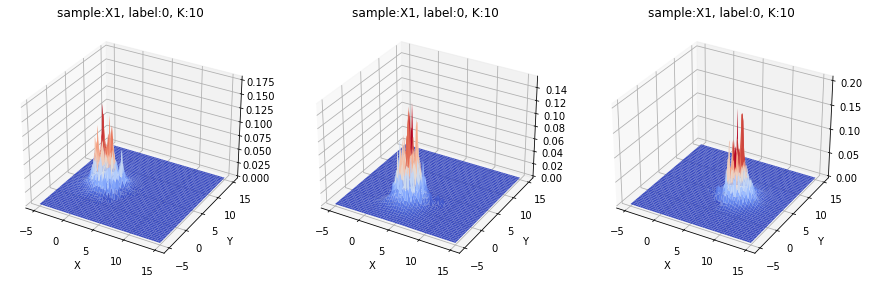

K取 15   概率密度图如下：


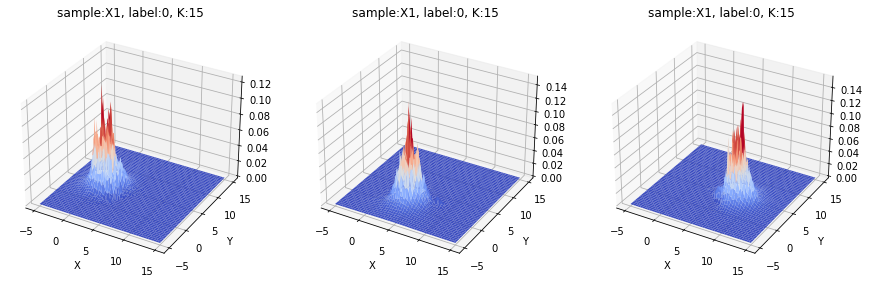

K取 20   概率密度图如下：


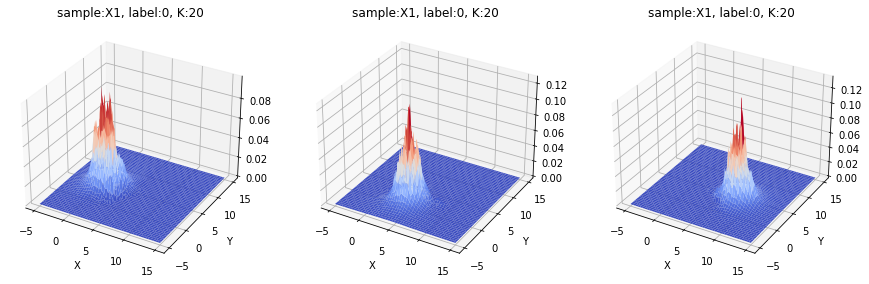

In [26]:
K = [10,15,20]
for k_i in K:
    p = Kneibor_Eval(X1, k_i)  # 获得概率密度估计
    print("K取",k_i,"  概率密度图如下：")
    Show_Probability(p,k_i)